# COBAR Project 

Authors: Célia Benquet, Artur Jesslen & Léa Schmidt

In [21]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns

In [244]:
pd.set_option('mode.chained_assignment', None)
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

## 1. Load the data 

In [14]:

path_MDN = 'data/MDN/U3_f'
with open(path_MDN + '/MDN_U3_f_trackingData.pkl', 'rb') as f: 
    data_MDN = pickle.load(f)
    
path_SS = 'data/SS01540/U3_f'
with open(path_SS + '/SS01540_U3_f_trackingData.pkl', 'rb') as f: 
    data_SS = pickle.load(f)
    
path_PR = 'data/PR/U3_f'
with open(path_PR + '/PR_U3_f_trackingData.pkl', 'rb') as f: 
    data_PR = pickle.load(f)

In [9]:
data_MDN.head()

bodyparts                                               RFbodyCoxa             \
coords                                                           x          y   
stimulation exp_stage replicate datetime      fly frame                         
p3-4        on1       1         200206_110534 0   0      72.901329  56.344170   
                                                  1      71.777756  45.046928   
                                                  2      72.036148  45.864689   
                                                  3      73.046509  45.744194   
                                                  4      72.914619  45.011112   

bodyparts                                               RFfemurTibia  \
coords                                                             x   
stimulation exp_stage replicate datetime      fly frame                
p3-4        on1       1         200206_110534 0   0        80.114677   
                                                  1        78.028427   
                                                  2        79.045105   
                                                  3        79.705597   
                                                  4        79.628120   

bodyparts                                                           \
coords                                                           y   
stimulation exp_stage replicate datetime      fly frame              
p3-4        on1       1         200206_110534 0   0      49.014732   
                                                  1      41.694813   
                                                  2      41.135693   
                                                  3      41.003326   
                                                  4      41.026436   

bodyparts                                               RFtibiaTarsus  \
coords                                                              x   
stimulation exp_stage replicate datetime      fly frame                 
p3-4        on1       1         200206_110534 0   0         77.573349   
                                                  1         75.056694   
                                                  2         74.927155   
                                                  3         75.333961   
                                                  4         75.938721   

bodyparts                                                              RFclaw  \
coords                                                           y          x   
stimulation exp_stage replicate datetime      fly frame                         
p3-4        on1       1         200206_110534 0   0      44.612289  77.028603   
                                                  1      34.304916  75.468513   
                                                  2      35.021431  74.710403   
                                                  3      34.648506  74.682800   
                                                  4      34.205185  75.599037   

bodyparts                                                          RMbodyCoxa  \
coords                                                           y          x   
stimulation exp_stage replicate datetime      fly frame                         
p3-4        on1       1         200206_110534 0   0      35.606697  73.760452   
                                                  1      24.808531  73.836151   
                                                  2      25.946522  71.525970   
                                                  3      25.991291  72.198372   
                                                  4      25.101078  74.816185   

bodyparts                                                           ...  \
coords                                                           y  ...   
stimulation exp_stage replicate datetime      fly frame             ...   
p3-4        on1       1         200206_110534 0   0      64.720200  ...   
                              

In [10]:
data_SS.head()

bodyparts                                                  Abdomen             \
coords                                                           x          y   
stimulation exp_stage replicate datetime      fly frame                         
p3-4        on1       1         200206_110645 0   0      72.115120  91.769394   
                                                  1      71.414879  92.796173   
                                                  2      68.943985  92.105721   
                                                  3      70.580963  92.909103   
                                                  4      70.601608  92.041710   

bodyparts                                               LFbodyCoxa             \
coords                                                           x          y   
stimulation exp_stage replicate datetime      fly frame                         
p3-4        on1       1         200206_110645 0   0      66.415245  42.189182   
                                                  1      67.768364  44.027401   
                                                  2      65.218330  43.892605   
                                                  3      67.186554  42.450130   
                                                  4      67.758507  43.110973   

bodyparts                                                   LFclaw             \
coords                                                           x          y   
stimulation exp_stage replicate datetime      fly frame                         
p3-4        on1       1         200206_110645 0   0      57.599110  21.529346   
                                                  1      50.402603  17.497181   
                                                  2      43.675549  15.678867   
                                                  3      50.294552  13.763040   
                                                  4      54.935307  18.858454   

bodyparts                                               LFfemurTibia  \
coords                                                             x   
stimulation exp_stage replicate datetime      fly frame                
p3-4        on1       1         200206_110645 0   0        58.165234   
                                                  1        57.006588   
                                                  2        56.466919   
                                                  3        57.863735   
                                                  4        59.773296   

bodyparts                                                           \
coords                                                           y   
stimulation exp_stage replicate datetime      fly frame              
p3-4        on1       1         200206_110645 0   0      40.284565   
                                                  1      38.300247   
                                                  2      37.104954   
                                                  3      37.260109   
                                                  4      39.947693   

bodyparts                                               LFtibiaTarsus  \
coords                                                              x   
stimulation exp_stage replicate datetime      fly frame                 
p3-4        on1       1         200206_110645 0   0         60.048637   
                                                  1         56.110020   
                                                  2         51.083153   
                                                  3         56.186291   
                                                  4         59.066265   

bodyparts                                                           ...  \
coords                                                           y  ...   
stimulation exp_stage replicate datetime      fly frame             ...   
p3-4        on1       1         200206_110645 0   0      33.859730  ...   
                              

In [15]:
data_PR.head()

bodyparts                                                  Abdomen             \
coords                                                           x          y   
stimulation exp_stage replicate datetime      fly frame                         
p3-4        on0       1         200206_111841 0   0      67.435562  95.818367   
                                                  1      67.602348  94.953949   
                                                  2      67.908539  95.056274   
                                                  3      68.288712  95.289276   
                                                  4      67.722198  95.475037   

bodyparts                                               LFbodyCoxa             \
coords                                                           x          y   
stimulation exp_stage replicate datetime      fly frame                         
p3-4        on0       1         200206_111841 0   0      64.634178  45.248268   
                                                  1      65.199059  45.997723   
                                                  2      66.099251  44.227280   
                                                  3      65.674843  44.309505   
                                                  4      65.751465  44.071938   

bodyparts                                                   LFclaw             \
coords                                                           x          y   
stimulation exp_stage replicate datetime      fly frame                         
p3-4        on0       1         200206_111841 0   0      43.058323  16.910597   
                                                  1      47.016678  17.116409   
                                                  2      52.351982  21.738865   
                                                  3      56.876991  26.199699   
                                                  4      57.093079  27.863937   

bodyparts                                               LFfemurTibia  \
coords                                                             x   
stimulation exp_stage replicate datetime      fly frame                
p3-4        on0       1         200206_111841 0   0        53.587608   
                                                  1        57.111351   
                                                  2        57.725693   
                                                  3        56.234062   
                                                  4        56.832146   

bodyparts                                                           \
coords                                                           y   
stimulation exp_stage replicate datetime      fly frame              
p3-4        on0       1         200206_111841 0   0      37.467407   
                                                  1      39.404526   
                                                  2      41.334419   
                                                  3      43.124619   
                                                  4      43.580143   

bodyparts                                               LFtibiaTarsus  \
coords                                                              x   
stimulation exp_stage replicate datetime      fly frame                 
p3-4        on0       1         200206_111841 0   0         50.797424   
                                                  1         52.882084   
                                                  2         54.575062   
                                                  3         58.549519   
                                                  4         59.166523   

bodyparts                                                           ...  \
coords                                                           y  ...   
stimulation exp_stage replicate datetime      fly frame             ...   
p3-4        on0       1         200206_111841 0   0      29.625332  ...   
                              

## Part III: A deep study of behaviors driven by activation of specific DNs

### 2. Analysis using the DeepLabCut joint position

#### a. MDN data-set

We will plot the kinematics over time of the six pretarsus (aka. claws) of the flies. 

In [189]:
#copy of the data-set to be able to modify
data_joint = data_MDN.copy()
#remove index to access them 
data_joint = data_joint.reset_index()
data_joint.head()

bodyparts stimulation exp_stage replicate       datetime fly frame RFbodyCoxa  \
coords                                                                      x   
0                p3-4       on1         1  200206_110534   0     0  72.901329   
1                p3-4       on1         1  200206_110534   0     1  71.777756   
2                p3-4       on1         1  200206_110534   0     2  72.036148   
3                p3-4       on1         1  200206_110534   0     3  73.046509   
4                p3-4       on1         1  200206_110534   0     4  72.914619   

bodyparts            RFfemurTibia             ...     Thorax             \
coords             y            x          y  ...          x          y   
0          56.344170    80.114677  49.014732  ...  71.554794  64.794495   
1          45.046928    78.028427  41.694813  ...  70.660706  53.910965   
2          45.864689    79.045105  41.135693  ...  70.632141  54.699944   
3          45.744194    79.705597  41.003326  ...  71.857552  54.517776   
4          45.011112    79.628120  41.026436  ...  71.385384  53.595985   

bodyparts    Abdomen             center                               \
coords             x           y   posx   posy orientation    posx_n   
0          73.791115  102.580902  728.0  131.0  350.151031  0.000000   
1          69.970039   91.748657  729.0  130.0  339.613907 -1.156314   
2          68.539345   90.960152  729.0  131.0  339.605774 -0.985262   
3          69.375534   91.205620  729.0  129.0  338.990555 -1.327365   
4          68.970757   90.644432  728.0  130.0  339.843582 -0.171052   

bodyparts                          
coords       posy_n orientation_n  
0          0.000000      0.000000  
1          0.814210    349.462875  
2         -0.171052    349.454742  
3          1.799473    348.839523  
4          0.985262    349.692551  

[5 rows x 76 columns]

In [316]:
def get_single_coord(claw, data_joint, stage1, stage2=None):
    """""
    get x and y coordonates for each flies
    """""
    
    data_claw=data_joint[['exp_stage','fly',claw]]
    
    data_claw = data_claw[(data_claw['exp_stage']==stage1) || ((data_claw['exp_stage']==stage2)]
    
    data_claw_0 = data_claw[(data_claw['fly']==0)]
    x0 = data_claw_0[claw,'x']
    y0 = data_claw_0[claw,'y']

    data_claw_1 = data_claw[data_claw['fly']==1]
    x1 = data_claw_1[claw,'x']
    y1 = data_claw_1[claw,'y']

    data_claw_2 = data_claw[data_claw['fly']==2]
    x2 = data_claw_2[claw,'x']
    y2 = data_claw_2[claw,'y']

    return x0,y0,x1,y1,x2,y2

In [308]:
def display_claw(claw, data_joint, color, start, end): 
    """""
    claw = the current leg 
    start, end: to be able to plot displacement for a given window of time
    start = starting frame from 0 to 9590 
    end = ending frame from 0 to 9590
    for each fly, we get the coordonates using 'get_single_coord' 
    then plot displacement (x then y) for each fly for current leg 
    """""
    
    x0,y0,x1,y1,x2,y2 = get_single_coord(claw, data_joint)
    time = range(start, end)
    
    #x position 
    plt.subplot(231) 
    plt.plot(x0[start:end], time, color=color, label=claw, linewidth=0.7)
    plt.ylabel("time")
    plt.xlabel("x-position")
    plt.title("x-position for fly 0")
    plt.xlim((0,120))
    plt.legend()

    plt.subplot(232)
    plt.plot(x1[start:end], time, color=color, label=claw, linewidth=0.7)
    plt.ylabel("time")
    plt.xlabel("x-position")
    plt.title("x-position for fly 1")
    plt.xlim((0,120))
    plt.legend()

    plt.subplot(233)
    plt.plot(x2[start:end], time, color=color, label=claw, linewidth=0.7)
    plt.ylabel("time")
    plt.xlabel("x-position")
    plt.title("x-position for fly 2")
    plt.xlim((0,120))
    plt.legend()

    #y position 
    plt.subplot(234) 
    plt.plot(time, y0[start:end], color=color, label=claw, linewidth=0.7)
    plt.xlabel("time")
    plt.ylabel("y-position")
    plt.title("y-position for fly 0")
    plt.ylim((0,120))
    plt.legend()

    plt.subplot(235)
    plt.plot(time, y1[start:end], color=color, label=claw, linewidth=0.7)
    plt.xlabel("time")
    plt.ylabel("y-position")
    plt.title("y-position for fly 1")
    plt.ylim((0,120))
    plt.legend()

    plt.subplot(236)
    plt.plot(time, y2[start:end], color=color, label=claw, linewidth=0.7)
    plt.xlabel("time")
    plt.ylabel("y-position")
    plt.title("y-position for fly 2")
    plt.ylim((0,120))
    plt.legend()


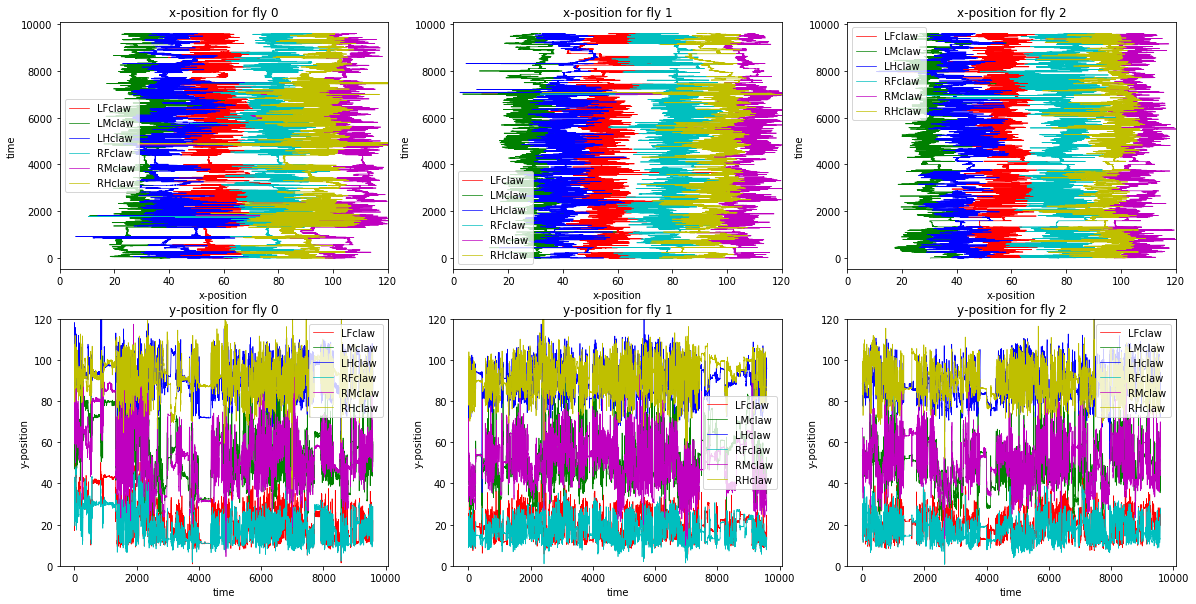

In [309]:
#display displacement for the all set of experiments 
start=0
end=9590

plt.figure(figsize=(20, 10))

#left set of legs 
display_claw('LFclaw', data_joint, 'r', start,end)
display_claw('LMclaw', data_joint, 'g', start,end)
display_claw('LHclaw', data_joint, 'b', start,end)

#right set of legs 
display_claw('RFclaw', data_joint, 'c', start,end)
display_claw('RMclaw', data_joint, 'm', start,end)
display_claw('RHclaw', data_joint, 'y', start,end)

plt.show()

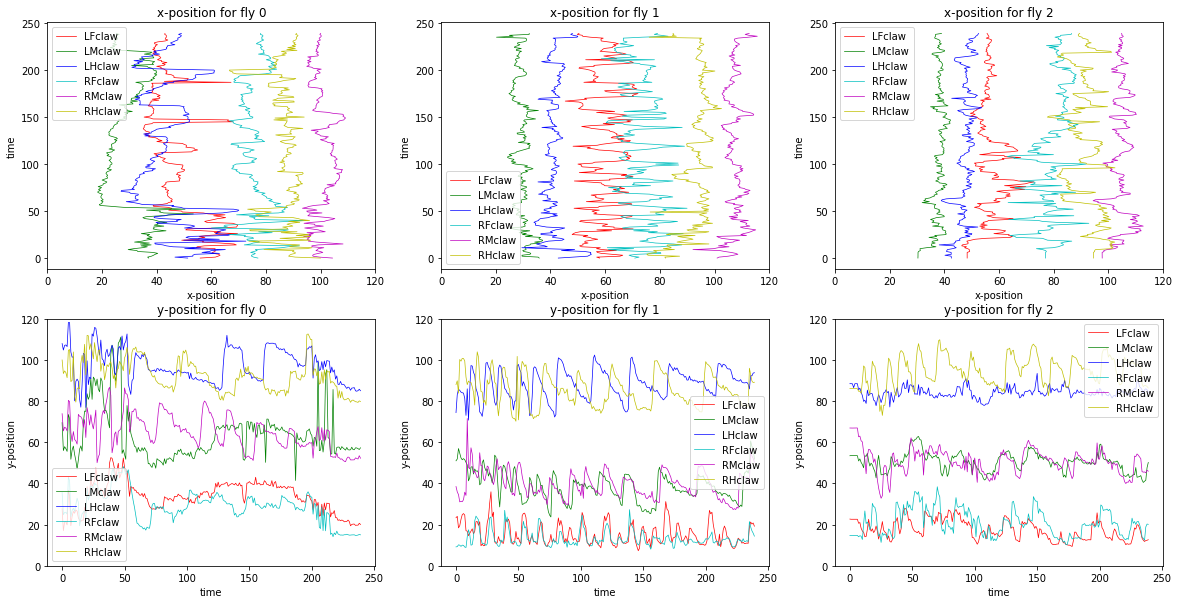

In [310]:
#display for an on-simulation 
#duration = 240 frames = 3sec 
start=0
end=240

plt.figure(figsize=(20, 10))

#left set of legs 
display_claw('LFclaw', data_joint, 'r', start,end)
display_claw('LMclaw', data_joint, 'g', start,end)
display_claw('LHclaw', data_joint, 'b', start,end)

#right set of legs 
display_claw('RFclaw', data_joint, 'c', start,end)
display_claw('RMclaw', data_joint, 'm', start,end)
display_claw('RHclaw', data_joint, 'y', start,end)

plt.show()

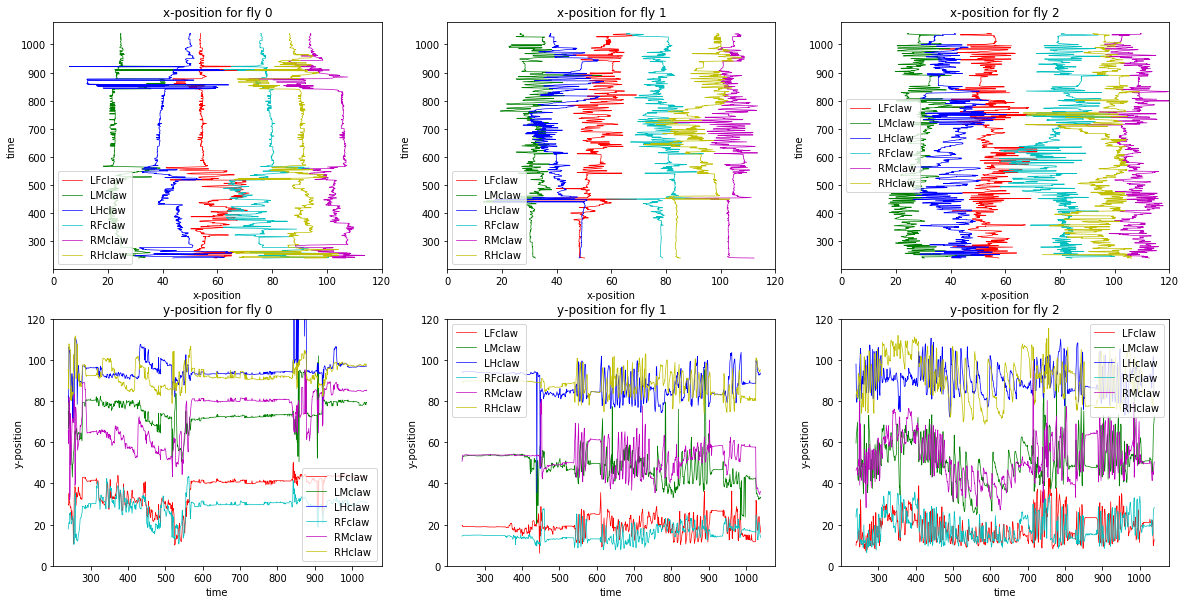

In [311]:
#plot for an off-simulation 
#duration = 800 frames = 10sec 
start=240
end=1040

plt.figure(figsize=(20, 10))

#left set of legs 
display_claw('LFclaw', data_joint, 'r', start,end)
display_claw('LMclaw', data_joint, 'g', start,end)
display_claw('LHclaw', data_joint, 'b', start,end)

#right set of legs 
display_claw('RFclaw', data_joint, 'c', start,end)
display_claw('RMclaw', data_joint, 'm', start,end)
display_claw('RHclaw', data_joint, 'y', start,end)

plt.show()

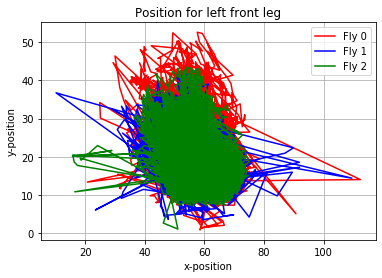

In [168]:
plt.plot(x0,y0,color='r', label='Fly 0')
plt.plot(x1,y1,color='b', label='Fly 1')
plt.plot(x2,y2,color='g', label='Fly 2')

plt.xlabel("x-position")
plt.ylabel("y-position")
plt.title("Position for left front leg")
plt.legend()
plt.grid()

In [171]:
#velocity 
lf_claw_0['LFclaw', 'dist'] = np.sqrt(lf_claw_0['LFclaw','x'].pow(2) + lf_claw_0['LFclaw','y'].pow(2))

In [183]:
lf_claw_0.head()

bodyparts       datetime fly     LFclaw                                   
coords                                x          y       dist        speed
0          200206_110534   0  55.937057  27.710566  62.424593  4993.967462
1          200206_110534   0  61.475689  17.054810  63.797546  5103.803670
2          200206_110534   0  62.479687  21.280468  66.004315  5280.345184
3          200206_110534   0  63.200310  21.402447  66.725886  5338.070890
4          200206_110534   0  62.693066  19.857700  65.762822  5261.025751

In [174]:
interval=1/80
lf_claw_0['LFclaw', 'speed'] = lf_claw_0['LFclaw', 'dist'] / interval

In [175]:
lf_claw_0

bodyparts       datetime fly     LFclaw                                   
coords                                x          y       dist        speed
0          200206_110534   0  55.937057  27.710566  62.424593  4993.967462
1          200206_110534   0  61.475689  17.054810  63.797546  5103.803670
2          200206_110534   0  62.479687  21.280468  66.004315  5280.345184
3          200206_110534   0  63.200310  21.402447  66.725886  5338.070890
4          200206_110534   0  62.693066  19.857700  65.762822  5261.025751
...                  ...  ..        ...        ...        ...          ...
23965      200206_153954   0  49.331116  12.379967  50.860816  4068.865241
23966      200206_153954   0  50.991287  14.651170  53.054389  4244.351088
23967      200206_153954   0  53.705563  19.493717  57.133987  4570.718955
23968      200206_153954   0  52.856720  20.378811  56.649173  4531.933824
23969      200206_153954   0  51.601822  22.009995  56.099803  4487.984229

[9590 rows x 6 columns]

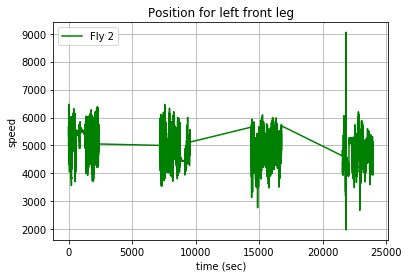

In [181]:
plt.plot(lf_claw_0['LFclaw', 'speed'],color='g', label='Fly 0')

plt.xlabel("time (sec)")
plt.ylabel("speed")
plt.title("Speed for left front leg")
plt.legend()
plt.grid()